0.9977735138046675


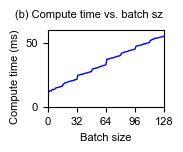

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import pearsonr

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

title_font_size = 8
tick_font_size = 8
label_size = 8

plt.rcParams["font.family"] = "Arial"

linewidth=1


all_times = []
all_batches = []
filenames = ['alexnet-p100.txt']
legends = ['ResNet18-P100']
colors = ['blue']

for filename in filenames:
	with open(filename) as f:
		df = pd.read_csv(filename, delimiter='\t')
		times = df['gpu_time'].to_list()
		batches = df['batch_size'].to_list()
		all_times.append(times)
		all_batches.append(batches)

# print(batches)
# print(times)

figure, axes = plt.subplots()
# axes.set_aspect( 1.1 )
x_range = [0,128]
y_range = [0,0.06]
axes.set_xlim(x_range)
axes.set_ylim(y_range)
plt.xticks([0,32,64,96,128], fontsize=tick_font_size)
plt.yticks([0, 0.05], [0, 50], fontsize=tick_font_size)

for i in range(len(filenames)):
	# plt.plot(all_batches[i], all_times[i], linewidth=linewidth, label=legends[i], color=colors[i])
	plt.plot(all_batches[i], all_times[i], lw=1, label=legends[i], color=colors[i])
	correlation_coefficient, _ = pearsonr(all_batches[i][0:128], all_times[i][0:128])
	print(correlation_coefficient)
plt.xlabel('Batch size', fontsize=title_font_size)
plt.ylabel('Compute time (ms)', fontsize=title_font_size, y=0.4)
plt.title('(b) Compute time vs. batch sz', fontsize=title_font_size, y=1.05, x=0.35)
# Time v.s. Batch Size

# Calculate Pearson correlation coefficient


# plt.legend(fontsize=label_size, markerfirst=False, borderpad=0.2, loc='upper left')
figure.set_size_inches(1.5, 1)
figure.set_dpi(100)
plt.savefig('smallbatch.eps', bbox_inches='tight', transparent=True)

plt.show()